<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This doesn't work for now..
#### Calculating the gradient descent is confusing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

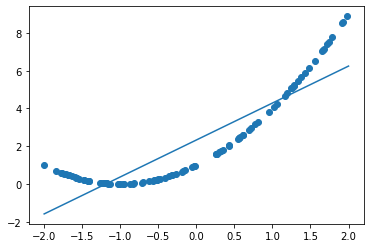

In [4]:
X = 4 * np.random.rand(100,1) - 2

Y = 4 + 2* X + X**2 - 3

reg = LinearRegression()
reg.fit(X,Y)

x_vals = np.linspace(-2,2,100).reshape(-1,1)
y_vals = reg.predict(x_vals)
plt.scatter(X,Y)
plt.plot(x_vals, y_vals)
plt.show()

In [5]:
def CalculatePolynomialForX(x, coefs):
  y = 0
  for power, a in enumerate(coefs):
    y += a * (x**power)
  return y

In [6]:
def plotPolynomial(coefs : list, a :int, b :int, X1=None, actual_data=None) -> None:
  x_vals = np.linspace(a,b,100).reshape(-1,1)
  y_vals = [CalculatePolynomialForX(x, coefs) for x in x_vals]
  plt.plot(x_vals, y_vals)
  plt.show()


In [38]:
import copy


class PolynomialRegression:
  def __init__(self, degrees):
    self.degrees = degrees
    self.W = np.zeros((degrees))
  
  def calculatePolynomial(self,X,W):
    res = [0] * len(X)
    for i in range(len(res)):
      for coef, w in enumerate(W):
        res[i] += w * X[i] ** coef    
    return res

  def compute_gradient(self,X,Y,W):
    dj_dw = np.zeros((len(W)))
    n = len(X)
    y_hat = self.calculatePolynomial(X,W)
    X_t = copy.deepcopy(X)
    X_t = self.normalize(X_t)
    for i in range(len(dj_dw)):
      for j in range(len(X)):
        dj_dw[i] += (X[j] ** i+1) * (Y[j]-y_hat[j])

    return dj_dw * (-2/n)
  
  def normalize(self, X):
    X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
    return X

  def train(self, X,Y, learning_rate=0.01, iters=100):
    hist = []
    W = self.W
    for i in range(iters):
      gradient = self.compute_gradient(X,Y,W)
      for j in range(len(gradient)):
        W[j] = W[j] - learning_rate * gradient[j]
      if (i%10)==0:
        y_hat = self.calculatePolynomial(X,W)
        loss = (1/len(X)) * np.sum((Y-y_hat)**2)
        hist.append(loss)
        
    self.W = W
    return hist

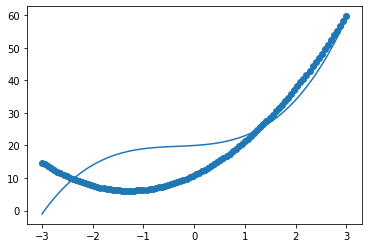

In [39]:
import matplotlib.pyplot as plt

X = [[x] for x in np.linspace(-3,3,100)]
Y = [x[0]**2 + x[0] + 20 + x[0]**3 for x in X]
X = np.array(X)
Y = np.array(Y)
# model training
reg = PolynomialRegression(3)
hist = reg.train(X,Y,iters=5000,learning_rate=0.0001)
plt.plot(X,Y)
plt.scatter(X,[CalculatePolynomialForX(x,reg.W) for x in X])

In [120]:
reg.W

array([10.,  3.])

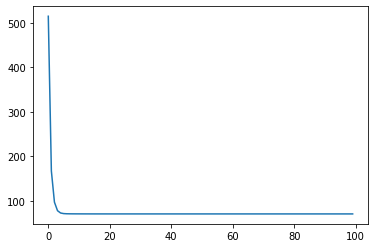

In [109]:
plt.plot(range(len(hist)), hist)

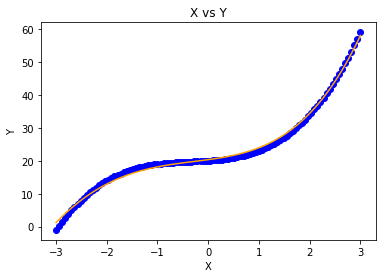

In [34]:
# Importing libraries

import numpy as np

import math

import matplotlib.pyplot as plt

# Univariate Polynomial Regression


class PolynomailRegression:
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # function to transform X
    def transform(self, X):
        # initialize X_transform
        X_transform = np.ones((self.m, 1))
        j = 0
        for j in range(1,self.degree + 1):
            x_pow = np.power(X, j)
            # append x_pow to X_transform
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)
        return X_transform

    # function to normalize X_transform
    def normalize(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        return X

    # model training
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        # weight initialization
        self.W = np.zeros(self.degree + 1)
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(self.X)
        # normalize X_transform
        X_normalize = self.normalize(X_transform)
        # gradient descent learning
        for i in range(self.iterations):
            h = self.predict(self.X)
            error = h - self.Y
            # update weights
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_normalize.T, error)
        return self

    # predict
    def predict(self, X):
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(X)
        X_normalize = self.normalize(X_transform)
        return np.dot(X_transform, self.W)


# Driver code
def main():
    # Create dataset
    X = [[x] for x in np.linspace(-3,3,100)]
    Y = [x[0]**2 + x[0] + 20 + x[0]**3 for x in X]
    X = np.array(X)
    Y = np.array(Y)
    # model training
    model = PolynomailRegression(degree=4, learning_rate=0.001, iterations=10000)
    model.fit(X, Y)
    Y_pred = model.predict(X)
    plt.scatter(X, Y, color="blue")
    plt.plot(X, Y_pred, color="orange")
    plt.title("X vs Y")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__ == "__main__":
    main()
